In [1]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Necessary Functions:
Used mainly for plotting the results of the segmentation.

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

## First Method
We use the `"SamAutomaticMaskGenerator"` function to automatically have masks for all objects in che canal, without feeding any extra info

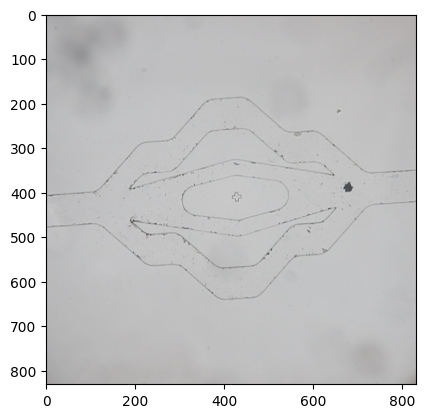

In [5]:
image_name = "/home/m4/git/DQN_for_Microrobot_control/binary_images/vascular_cropped.png"
img = cv2.imread('/home/m4/git/DQN_for_Microrobot_control/binary_images/vascular_cropped.png')
# img = cv2.imread(image_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.uint8)
plt.imshow(img)

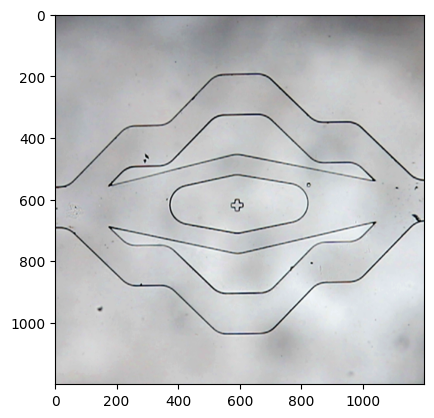

In [98]:
img = cv2.resize(img, (1200, 1200))
plt.imshow(img)

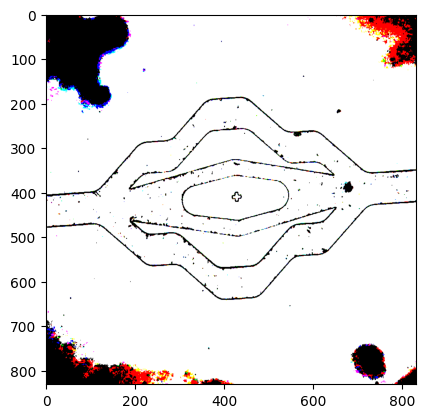

In [14]:
_, thresholded_image = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_image)

In [24]:
from utils.preprocessing import ThresholdMaskGenerator
thr = ThresholdMaskGenerator(img)
cv2.destroyAllWindows()
threshold = 2
foreground = []#[(57, 328), (61, 371), (138, 420), (179, 438), (246, 465), (284, 484), (307, 486), (340, 482), (367, 481), (399, 460), (440, 433), (471, 415), (505, 398), (542, 382), (568, 350), (591, 308), (578, 275), (518, 276), (467, 275), (249, 261), (287, 253), (334, 246), (363, 247), (168, 285), (142, 315), (160, 331), (174, 340), (217, 358), (257, 368), (292, 371), (336, 372), (367, 366), (577, 248), (532, 210), (473, 193), (415, 169), (333, 138), (295, 129), (239, 146), (196, 187), (159, 218), (97, 231), (65, 274)]
background = []#[(264, 328), (325, 321), (326, 307), (387, 317), (330, 195), (296, 198), (266, 210), (119, 264), (500, 245), (499, 350), (347, 415), (318, 428), (286, 430), (132, 377), (60, 488), (135, 533), (232, 558), (403, 564), (482, 547), (554, 498), (583, 457), (568, 159), (485, 102), (390, 63), (264, 45), (155, 62), (87, 119)]
good_enough = False
while not good_enough:
    img_thres = thr.threshold(threshold)
    cv2.imshow("Thresholded Image", img_thres)
    cv2.waitKey(100)
    threshold = input("New threshold: (leave empty to continue)  ")
    if threshold == "q" or threshold == "":
        break
    threshold = int(threshold)
cv2.destroyAllWindows()


print("Select the background poitns")
thr.set_backround_points(*background)

print("Select the foreground points")
thr.set_foreground_points(*foreground)

thr.color_rectangles("w")

print("Draw contours")
thr.draw_black_lines()
cv2.destroyAllWindows()

Select the background poitns
688 188
[(688, 188)]
681 598
[(681, 598)]
424 539
[(424, 539)]
429 411
[(429, 411)]
397 414
[(397, 414)]
434 286
[(434, 286)]
542 181
[(542, 181)]
751 118
[(751, 118)]
104 206
[(104, 206)]
414 538
[(414, 538)]
433 410
[(433, 410)]
416 294
[(416, 294)]
73 518
[(73, 518)]
777 570
[(777, 570)]
81 314
[(81, 314)]
729 267
[(729, 267)]
410 133
[(410, 133)]
697 111
[(697, 111)]
Select the foreground points
437 610
[(437, 610)]
275 534
[(275, 534)]
677 388
[(677, 388)]
787 366
[(787, 366)]
591 392
[(591, 392)]
568 389
[(568, 389)]
530 283
[(530, 283)]
403 238
[(403, 238)]
403 240
[(403, 240)]
315 284
[(315, 284)]
234 325
[(234, 325)]
114 432
[(114, 432)]
35 432
[(35, 432)]
203 424
[(203, 424)]
247 429
[(247, 429)]
326 460
[(326, 460)]
428 341
[(428, 341)]
430 337
[(430, 337)]
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressin

757 126
[(757, 126)]


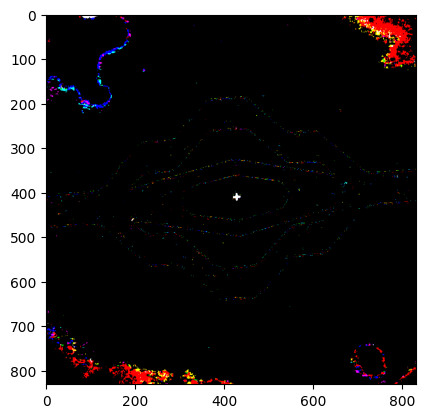

In [13]:
from image_postprocessing import select_image_points
seed_point = list(select_image_points(thresholded_image))

# Define the new color that you want to fill
black = (0, 0, 0)
white = (255, 255, 255)

# Define the flood fill tolerance
tolerance = (25,)*3

# Apply the flood fill algorithm
for point in seed_point:
    _, _, _, _ = cv2.floodFill(thresholded_image, None, point, black, tolerance, tolerance)

plt.imshow(thresholded_image)

In [12]:
plt.imsave("/home/m4/git/DQN_for_Microrobot_control/binary_images/test.png", thresholded_image)

In [25]:
from utils import ImageSegmentation

mask_in = None
segmentation = ImageSegmentation(image=thr.get_img_mask(), sam_checkpoint="../models/sam_vit_h_4b8939.pth")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[(437, 610), (275, 534), (677, 388), (787, 366), (591, 392), (568, 389), (530, 283), (403, 238), (403, 240), (315, 284), (234, 325), (114, 432), (35, 432), (203, 424), (247, 429), (326, 460), (428, 341), (430, 337)]
[(688, 188), (681, 598), (424, 539), (429, 411), (397, 414), (434, 286), (542, 181), (751, 118), (104, 206), (414, 538), (433, 410), (416, 294), (73, 518), (777, 570), (81, 314), (729, 267), (410, 133), (697, 111)]


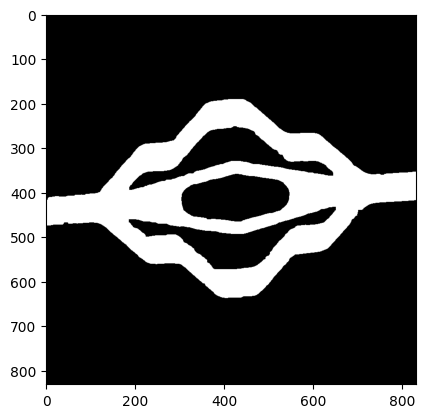

In [26]:
from utils.image_postprocessing import create_binary_bitmap, plot_cluster_on_image_blue
segmented, mask_in = create_binary_bitmap(thr.get_img_mask(), segmentation,
                                            foreground_points=thr.get_foreground_points(), 
                                            background_points=thr.get_background_points(),
                                            mask_in=mask_in, kernel_size=(3,3))
frame_cleaned = plot_cluster_on_image_blue(segmented, thresholded_image, 0)
plt.imshow(frame_cleaned)
cv2.waitKey(0)
cv2.destroyAllWindows()

Select input points:
311 179
[(311, 179)]
233 199
[(311, 179), (233, 199)]
224 272
[(311, 179), (233, 199), (224, 272)]
124 388
[(311, 179), (233, 199), (224, 272), (124, 388)]
424 384
[(311, 179), (233, 199), (224, 272), (124, 388), (424, 384)]
427 371
[(311, 179), (233, 199), (224, 272), (124, 388), (424, 384), (427, 371)]
231 364
[(311, 179), (233, 199), (224, 272), (124, 388), (424, 384), (427, 371), (231, 364)]
435 193
[(311, 179), (233, 199), (224, 272), (124, 388), (424, 384), (427, 371), (231, 364), (435, 193)]
108 172
[(311, 179), (233, 199), (224, 272), (124, 388), (424, 384), (427, 371), (231, 364), (435, 193), (108, 172)]
103 190
[(311, 179), (233, 199), (224, 272), (124, 388), (424, 384), (427, 371), (231, 364), (435, 193), (108, 172), (103, 190)]
152 86
[(311, 179), (233, 199), (224, 272), (124, 388), (424, 384), (427, 371), (231, 364), (435, 193), (108, 172), (103, 190), (152, 86)]
384 69
[(311, 179), (233, 199), (224, 272), (124, 388), (424, 384), (427, 371), (231, 364)

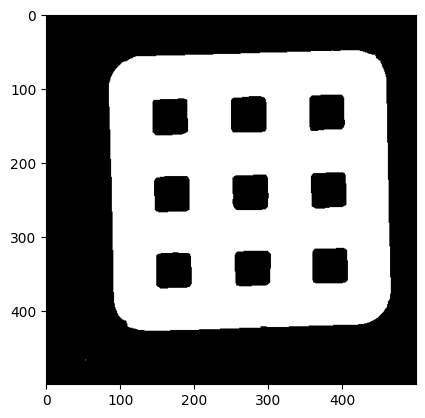

In [11]:
from utils.image_postprocessing import create_binary_bitmap, plot_cluster_on_image_blue, resize_and_crop_frame, find_legal_point_target_close, detect_largest_cluster
segmented, mask_in = create_binary_bitmap(thresholded_image, segmentation, mask_in=mask_in, kernel_size=(0,0), kernel_iteration=3)
frame_cleaned = plot_cluster_on_image_blue(segmented, thresholded_image, 0)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(frame_cleaned)
print("Segmentation done")

In [27]:
plt.imsave("/home/m4/git/DQN_for_Microrobot_control/binary_images/vascular_long_channel_mask.png", frame_cleaned)

In [69]:
sam = sam_model_registry["vit_h"](checkpoint="../models/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)


In [70]:
masks = mask_generator.generate(img)
print(len(masks))
print(masks[0].keys())

24
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


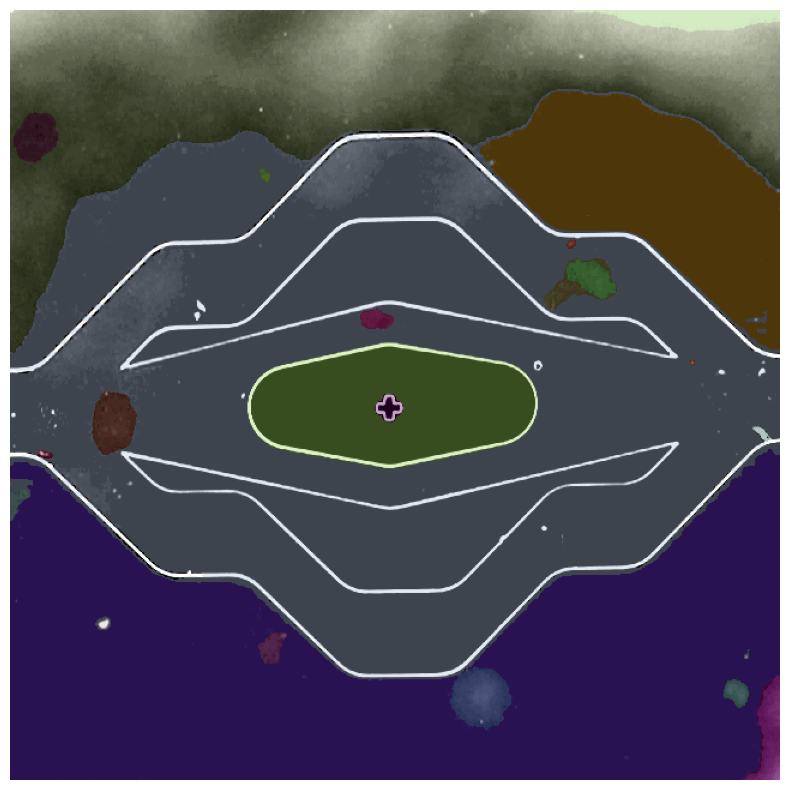

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(img)
show_anns(masks)
plt.axis('off')
plt.show() 

## Selecting objects with SAM

In [ ]:
predictor = SamPredictor(sam)

Process the image to produce an image embedding by calling ```SamPredictor.set_image```. The ```SamPredictor``` remembers this embedding and will use it for subsequent mask prediction.

In [ ]:
predictor.set_image(img)

To select the channel, choose a point on it. Points are input to the model in (x,y) format and come with labels 1 (foreground point) or 0 (background point). Multiple points can be input; here we use only one. The chosen point will be shown as a star on the image.

In [ ]:
input_point = np.array([[140, 850]])
input_label = np.array([1])

plt.figure(figsize=(10,10))
plt.imshow(img)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show() 

Predict with ```SamPredictor.predict```. The model returns masks, quality predictions for those masks, and low resolution mask logits that can be passed to the next iteration of prediction.

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)
# whatever

With `multimask_output=True` (the default setting), SAM outputs 3 masks, where scores gives the model's own estimation of the quality of these masks. This setting is intended for ambiguous input prompts, and helps the model disambiguate different objects consistent with the prompt. When `False`, it will return a single mask. For ambiguous prompts such as a single point, it is recommended to use `multimask_output=True` even if only a single mask is desired; the best single mask can be chosen by picking the one with the highest score returned in scores. This will often result in a better mask.

In [ ]:
masks.shape  # (number_of_masks) x H x W

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()


## Specifying a specific object with additional points

The single input point is ambiguous, and the model has returned multiple objects consistent with it. To obtain a single object, multiple points can be provided. If available, a mask from a previous iteration can also be supplied to the model to aid in prediction. When specifying a single object with multiple prompts, a single mask can be requested by setting `multimask_output=False`.

In [ ]:
input_point = np.array([[140, 450], [450, 200], [800, 600], [0,0], [500, 500]])
input_label = np.array([1, 1, 1, 0, 0])


plt.figure(figsize=(10,10))
plt.imshow(img)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show() 

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=None,
    multimask_output=False,
)

In [ ]:
print(masks[0])

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

Select input points:
223 297
[(223, 297)]
313 348
[(223, 297), (313, 348)]
138 453
[(223, 297), (313, 348), (138, 453)]
290 490
[(223, 297), (313, 348), (138, 453), (290, 490)]
360 680
[(223, 297), (313, 348), (138, 453), (290, 490), (360, 680)]
224 618
[(223, 297), (313, 348), (138, 453), (290, 490), (360, 680), (224, 618)]
741 653
[(223, 297), (313, 348), (138, 453), (290, 490), (360, 680), (224, 618), (741, 653)]
895 551
[(223, 297), (313, 348), (138, 453), (290, 490), (360, 680), (224, 618), (741, 653), (895, 551)]
723 502
[(223, 297), (313, 348), (138, 453), (290, 490), (360, 680), (224, 618), (741, 653), (895, 551), (723, 502)]
604 243
[(223, 297), (313, 348), (138, 453), (290, 490), (360, 680), (224, 618), (741, 653), (895, 551), (723, 502), (604, 243)]
[[223 297]
 [313 348]
 [138 453]
 [290 490]
 [360 680]
 [224 618]
 [741 653]
 [895 551]
 [723 502]
 [604 243]]
Select negative points:
557 315
[(557, 315)]
574 495
[(557, 315), (574, 495)]
223 381
[(557, 315), (574, 495), (223, 3

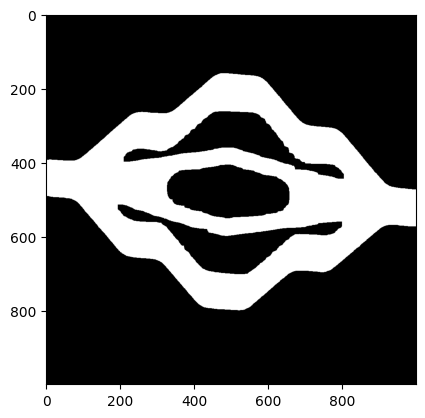

In [15]:
plt.imsave("segmented_image.png", frame_cleaned)


## Specifying a specific object with a box

The model can also take a box as input, provided in xyxy format.


In [ ]:
input_box = np.array([50, 50, 900, 900])

masks, scores, logits = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=True,
)

for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_mask(mask, plt.gca())
    show_box(input_box, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()


## Combining points and boxes

Points and boxes may be combined, just by including both types of prompts to the predictor. Here this can be used to select just the trucks's tire, instead of the entire wheel.


In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=True,
)

for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    show_box(input_box, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

